In [1]:
# Aula 51 Watershed

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [4]:
sep_coins = cv2.imread('../DATA/pennies.jpg')

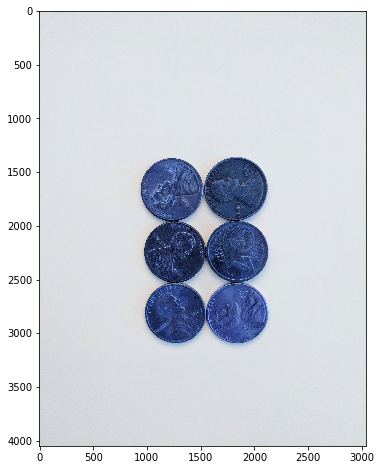

In [5]:
display(sep_coins)

In [6]:
# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

In [7]:
sep_coins = cv2.medianBlur(sep_coins, 25)

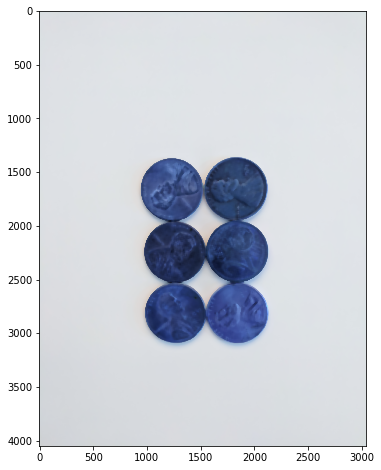

In [8]:
display(sep_coins)

In [9]:
gray_sep_coins = cv2.cvtColor(sep_coins, cv2.COLOR_BGR2GRAY)

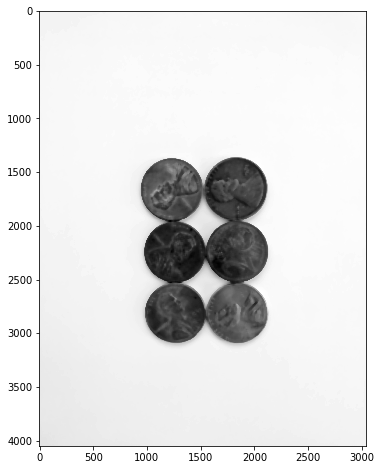

In [10]:
display(gray_sep_coins)

In [11]:
ret, sep_thresh = cv2.threshold(gray_sep_coins, 160, 255, cv2.THRESH_BINARY_INV)

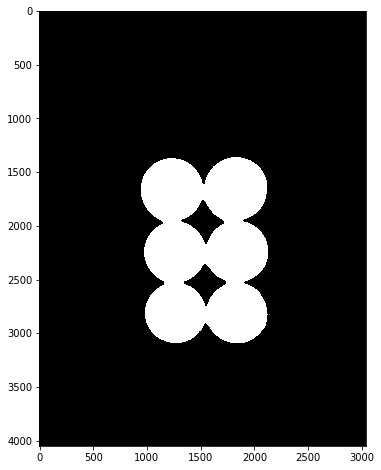

In [12]:
display(sep_thresh)

In [13]:
image, contours, hierarchy = cv2.findContours(sep_thresh.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [14]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

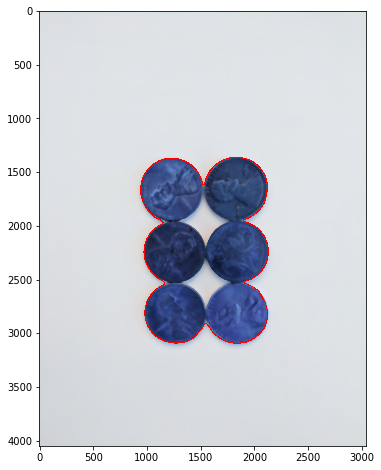

In [15]:
display(sep_coins)

In [20]:
img = cv2.imread('../DATA/pennies.jpg')

In [23]:
img = cv2.medianBlur(img, 35)

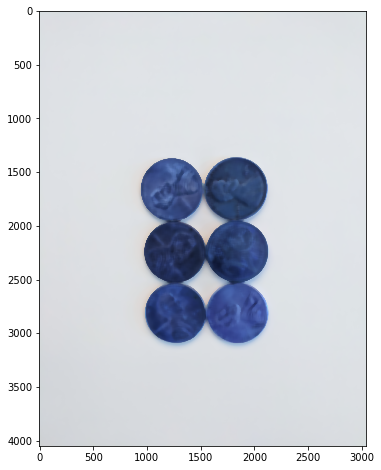

In [24]:
display(img)

In [25]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [34]:
ret, thresh = cv2.threshold(gray, 150, 255, cv2.THRESH_BINARY_INV)

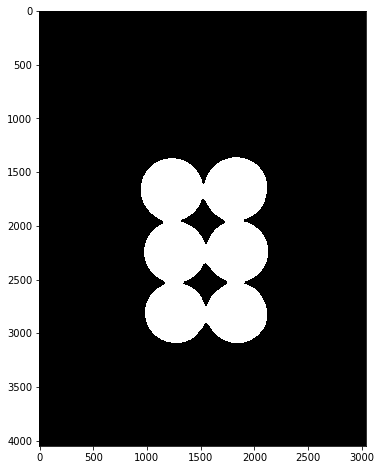

In [35]:
display(thresh)

In [36]:
ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

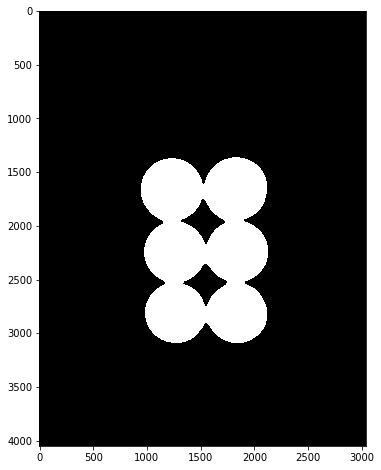

In [39]:
display(thresh)

In [40]:
#Noise Removal

In [42]:
kernel = np.ones((3,3), np.uint8)

In [43]:
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=2)

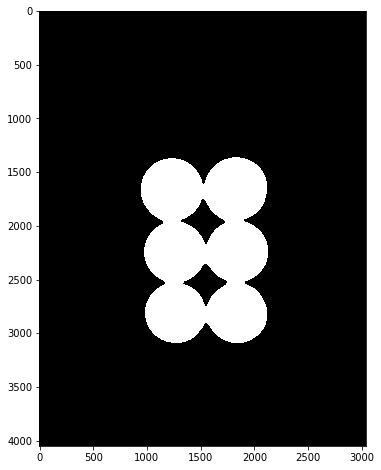

In [44]:
display(opening)

In [45]:
dist_tranform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)

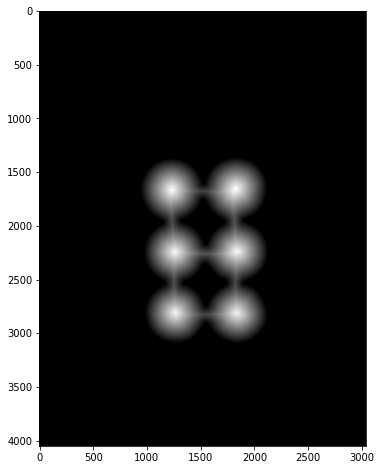

In [46]:
display(dist_tranform)

In [50]:
ret, sure_fg = cv2.threshold(dist_tranform, 0.7*dist_tranform.max(), 255,0)

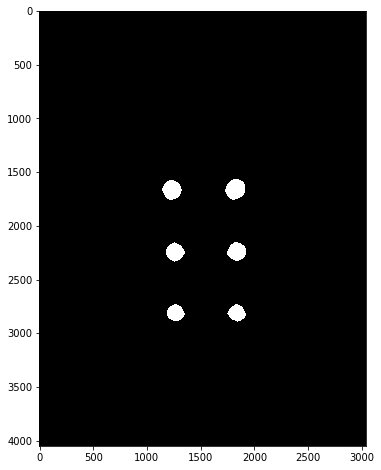

In [56]:
display(sure_fg)

In [57]:
sure_bg = cv2.dilate(opening, kernel, iterations = 3)

In [58]:
sure_fg = np.uint8(sure_fg)

In [59]:
unknown = cv2.subtract(sure_bg, sure_fg)

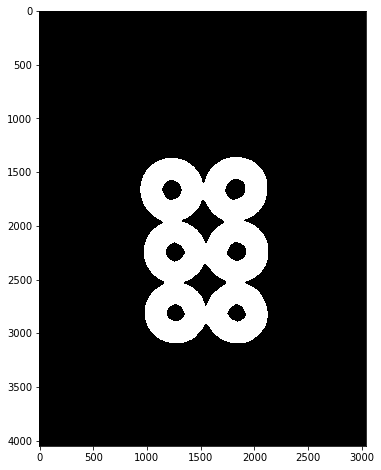

In [60]:
display(unknown)

In [61]:
ret, marker = cv2.connectedComponents(sure_fg)

In [65]:
marker = marker + 1

In [66]:
marker[unknown==255] = 0

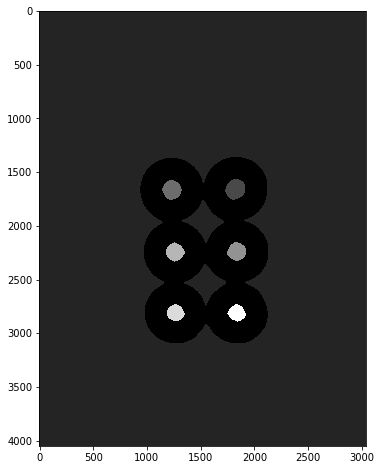

In [67]:
display(marker)

In [68]:
marker = cv2.watershed(img, marker)

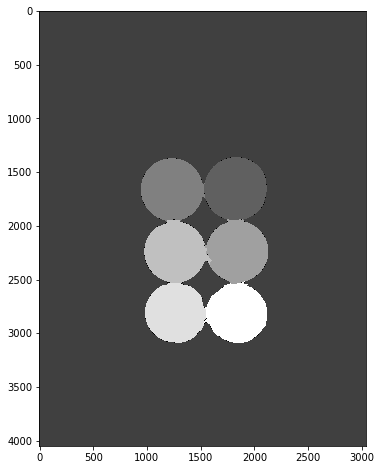

In [69]:
display(marker)

In [74]:
image, contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

In [78]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins, contours, i, (255,0,0), 10)

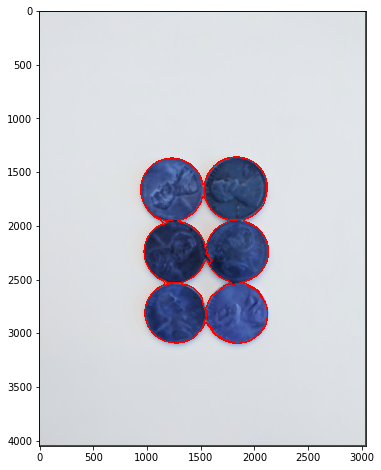

In [79]:
display(sep_coins)